## Data Analysis on Medical Dataset
1. About the Dataset: This  datase  contaisg information about individual patients, including their age, sex, body mass index (BMI), number of children, smoking status, and region.
2. Goal: Ther goal is to use this information to predict the amount of money a patient will spend on hospital charges"

3. Steps involved:

    (I) I will perform exploratory data analysis (EDA) to understand the distribution of the data and identify any patterns or trends.

    (ii) Next, I will preprocess the data to prepare it for modeling.

    (iii) I will then use linear regression to build a model to predict hospital charges.

    (iv) Finally, I will evaluate the performance of the model and visualize the results.

I will use various techniques such as visualizations, statistical analysis and data preprocessing to uncover insights and build a robust model.

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [158]:
data = pd.read_csv('medical_data.csv')

In [159]:
data.shape

(1338, 7)

In [160]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [161]:
data.isnull().sum()  # finding any null value present in each column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [163]:
data.describe() # quick statistical overview

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [164]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,6)

## 1. Exploratory Data Analysis

## Age

In [165]:
data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Distribution of age')

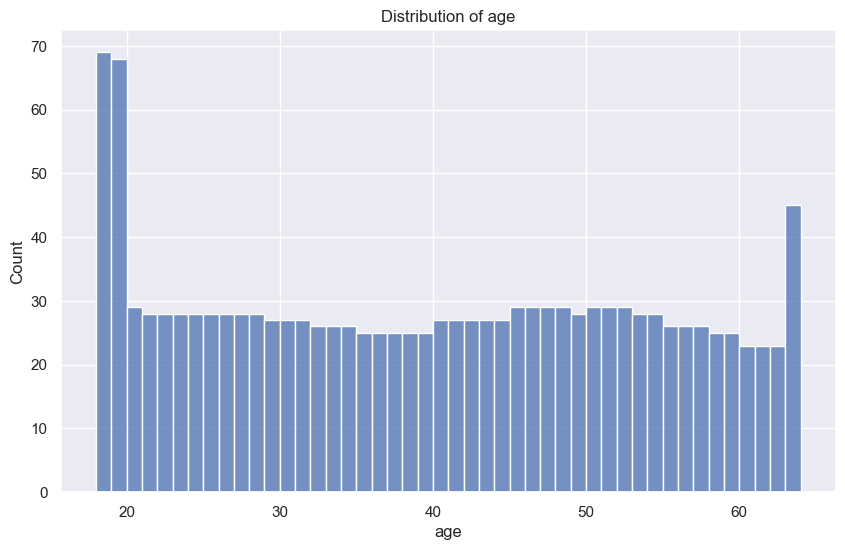

In [166]:
sns.histplot(data['age'], bins = 46)
plt.title('Distribution of age')

<Axes: xlabel='age'>

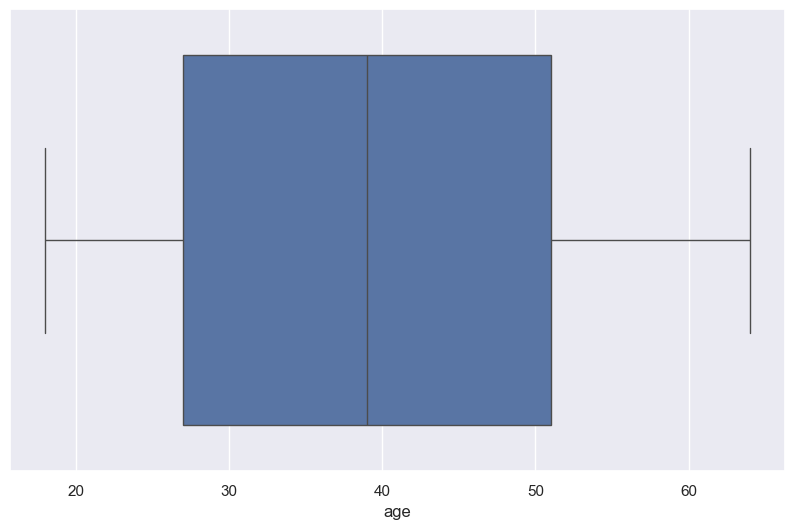

In [167]:
sns.boxplot(data['age'], orient = 'h', linewidth = 1)

### Insights 
1. The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age.2. Agess 18-19 which seem twice as many customers

## BMI

In [168]:
data.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Text(0.5, 1.0, 'Distribution of BMI')

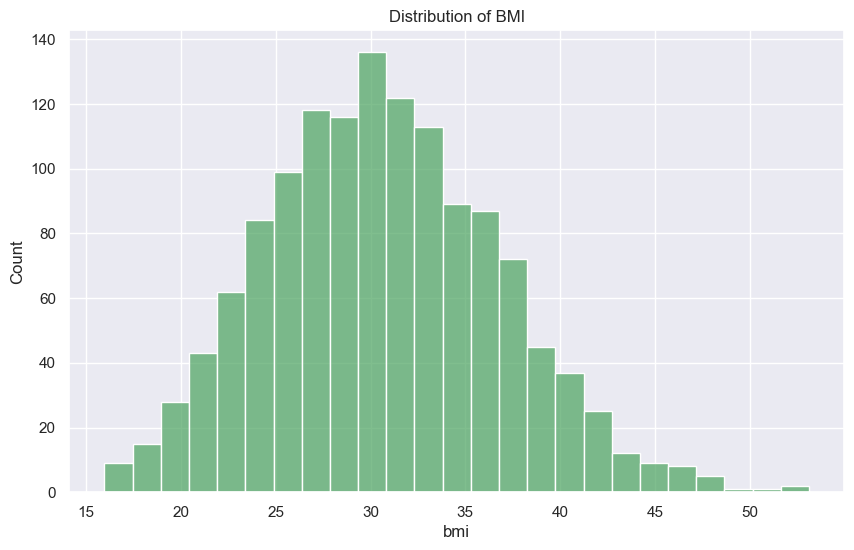

In [169]:
sns.histplot(data['bmi'], color = 'g')
plt.title('Distribution of BMI')

In [170]:
bmi_25_to_35 = (data['bmi'] >= 25) & (data['bmi']  <=35)
bmi_25_to_35.mean()

0.5807174887892377

<Axes: xlabel='bmi'>

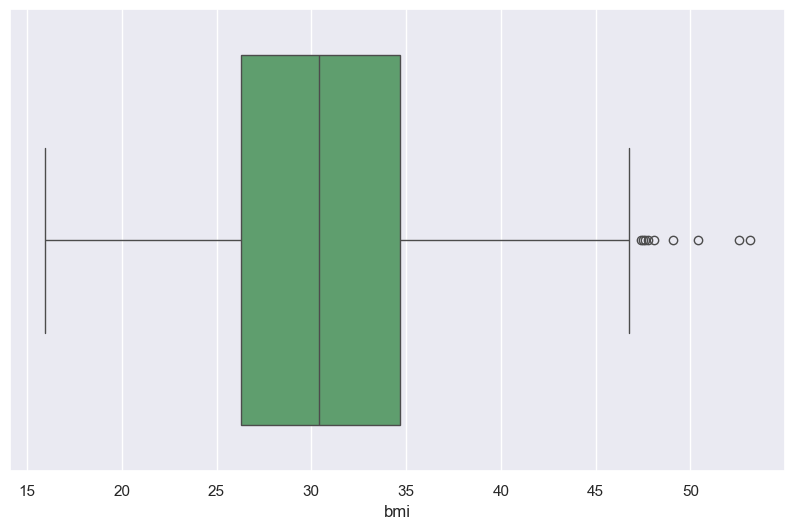

In [171]:
sns.boxplot(data['bmi'], orient='h', color='g')

## Insights

1. About 58% of the above distribution the BMI is between 25 to 35

## Smokers

Text(0.5, 1.0, 'Smokers count')

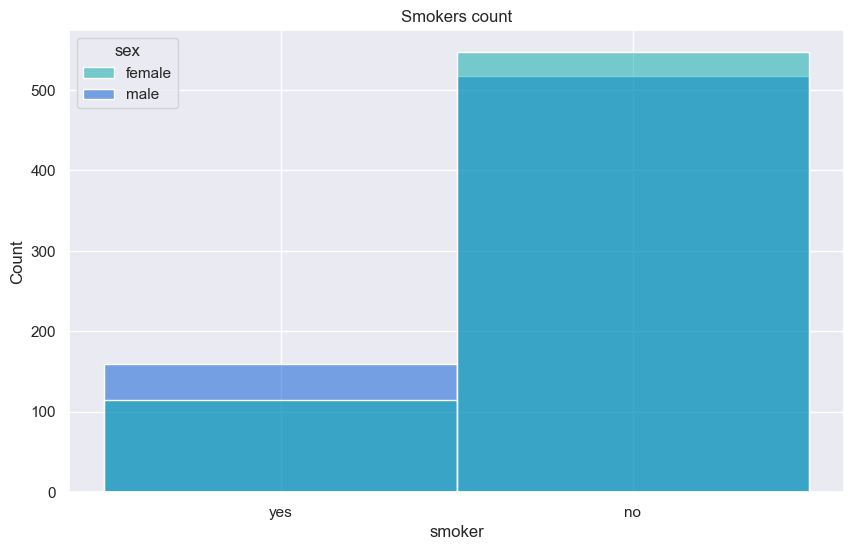

In [172]:
sns.histplot( x = data['smoker'], hue = data['sex'], palette='winter_r')
plt.title('Smokers count')

## Insights

1. About 20% of the customers are smokers.
2. Males are more likely to smoke.

## 2. Bivariate Analysis

In [173]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Comparing medical charges and smokers

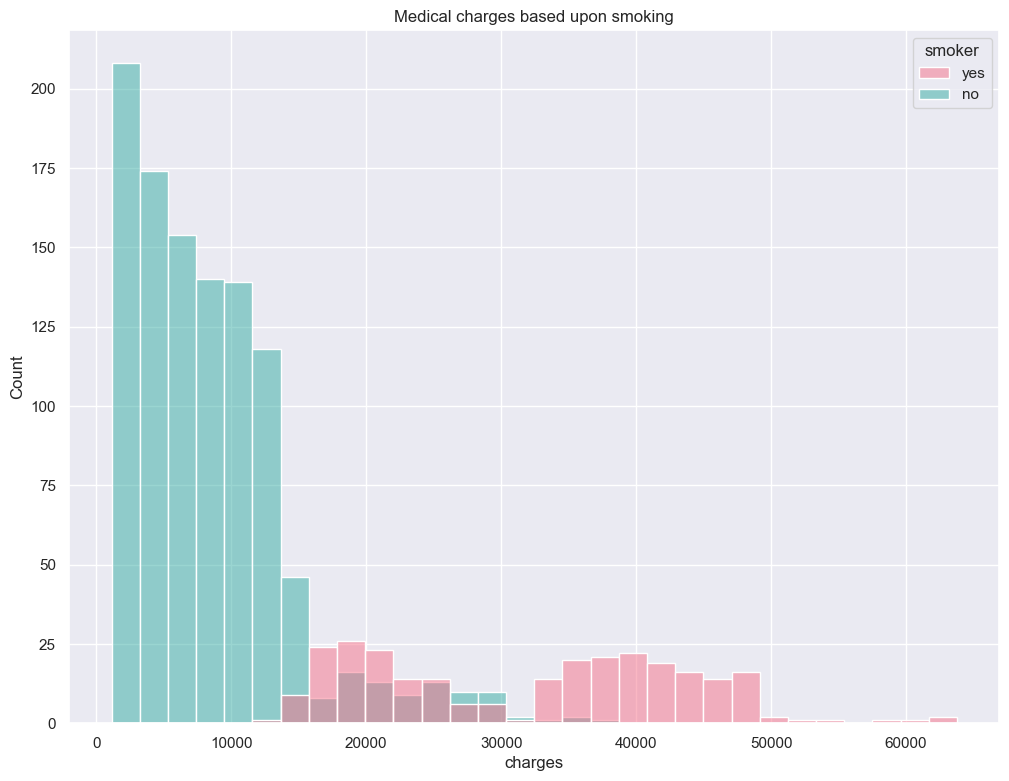

In [174]:
sns.set(rc={'figure.figsize': (12,9)})
sns.histplot(x=data['charges'], hue=data['smoker'], palette='husl')
plt.title('Medical charges based upon smoking')
plt.show()

In [175]:
data.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

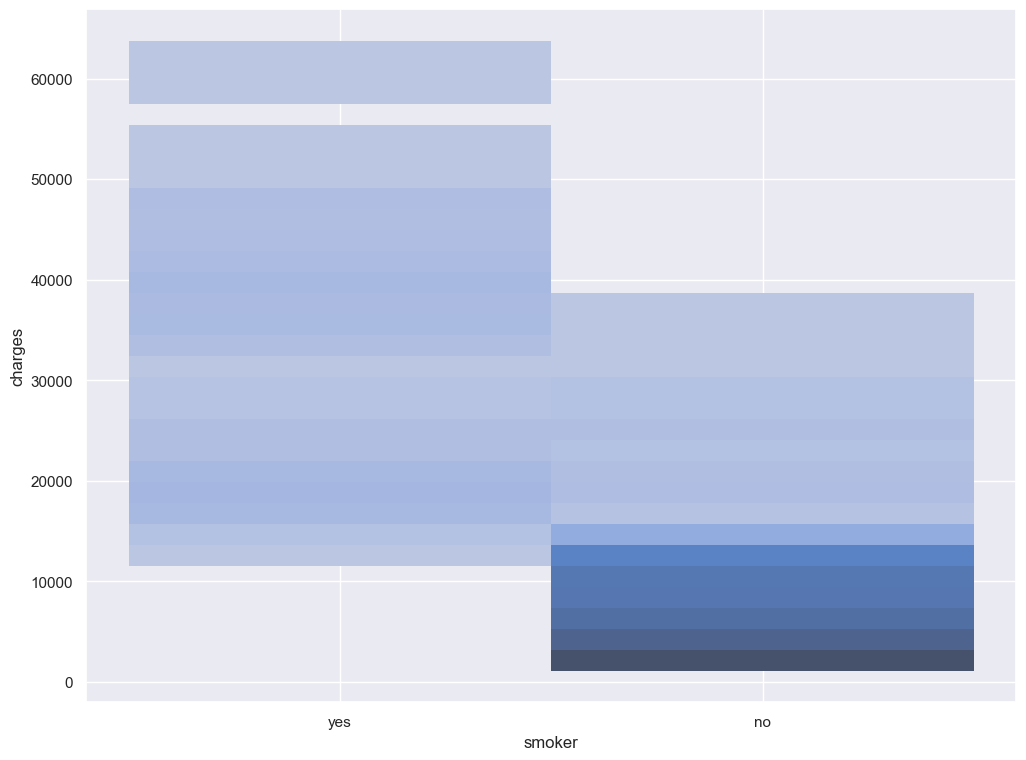

In [176]:
sns.histplot(x = data['smoker'], y = data['charges'])
plt.show()

## Insights
1. The aAverage chargs for smokersis  32000 and fornon--smokesr is 850, There is a significant difference.0

### Comparing medical charges and sex

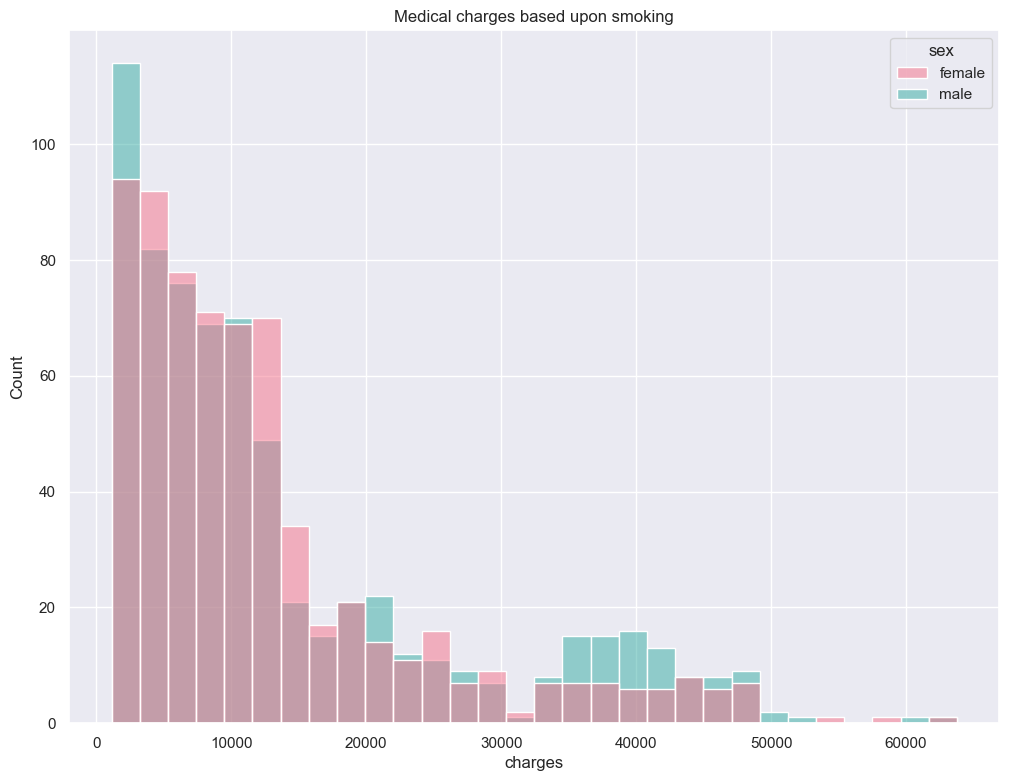

In [177]:
sns.set(rc={'figure.figsize': (12,9)})
sns.histplot(x=data['charges'], hue=data['sex'], palette='husl')
plt.title('Medical charges based upon smoking')
plt.show()

In [178]:
data.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

## Insights

1. The difference is pretty low and there is no significant differences while comparing the charges and sex.

## Comparing medical charges and sex

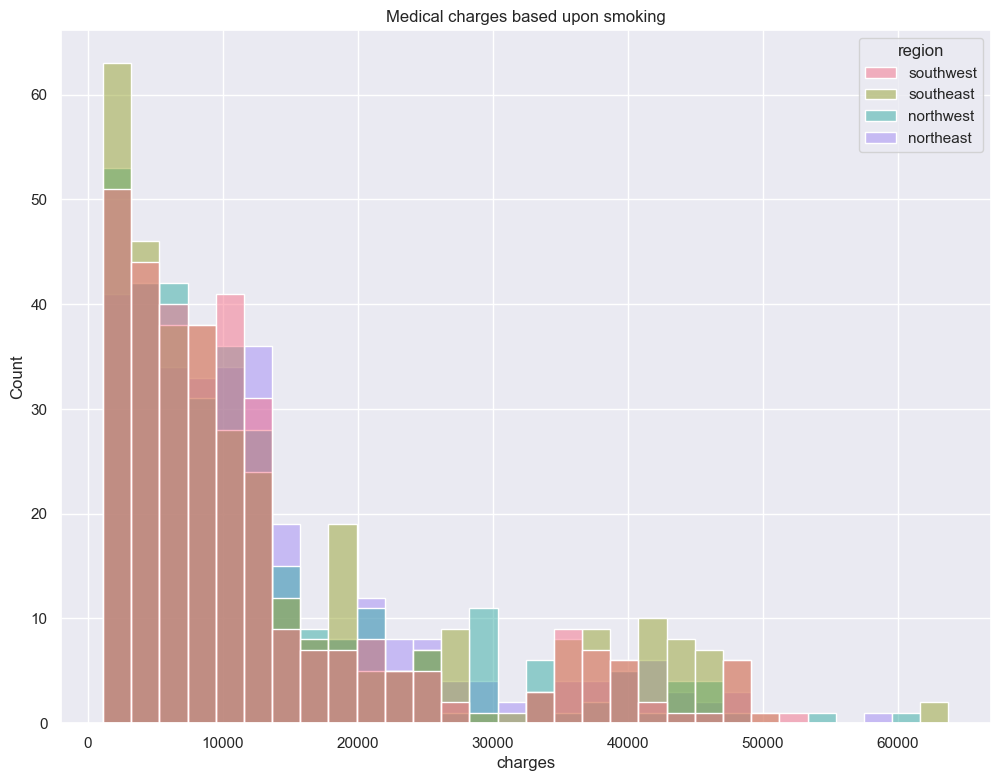

In [179]:
sns.set(rc={'figure.figsize': (12,9)})
sns.histplot(x=data['charges'], hue=data['region'], palette='husl')
plt.title('Medical charges based upon smoking')
plt.show()

In [180]:
data.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

### Insights based on age.

<Axes: xlabel='age', ylabel='charges'>

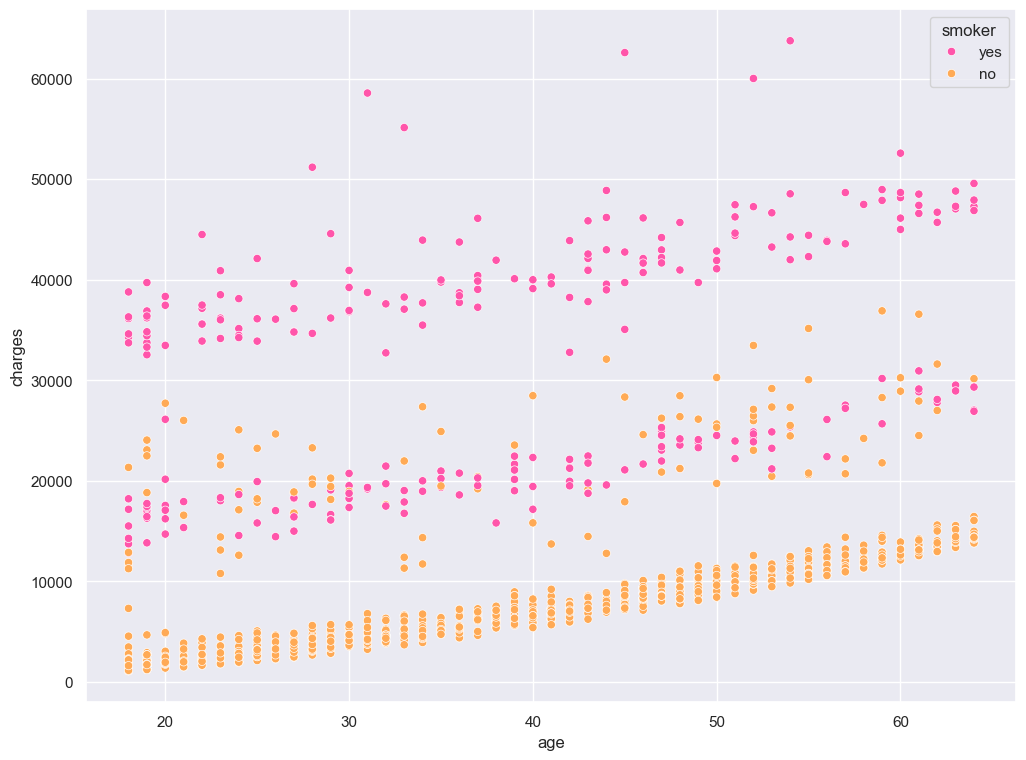

In [181]:
sns.scatterplot(data, x='age', y='charges', hue='smoker', palette = 'spring')

## Insights

1. There is a trend seems to be that medical charges increase with age.
2. There is a significant variation in every age, so age alone cannot be used to accurately determine the charges.
3. The first cluster (Yellow), were presumably 'healthy non-smokers', who have relatively low medical charges compared to others.
4. The second cluster (Yellow and Pink), is a mix of smokers and non-smokers. They may be non-smokers with medical issues and smokers with major medical issues.
5. The final cluster(Pink) is exclusively of smokers. Presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### Insights based on bmi.

<Axes: xlabel='bmi', ylabel='charges'>

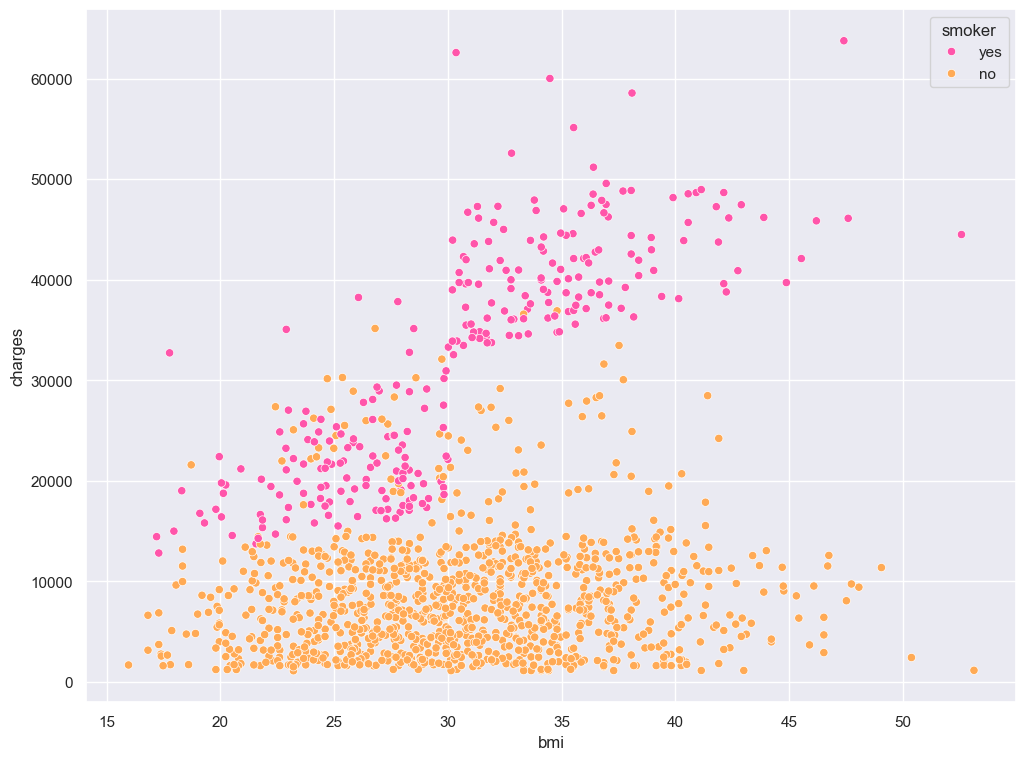

In [182]:
sns.scatterplot(data, x='bmi', y='charges', hue='smoker', palette = 'spring')

## Insights

1. From the clusters, Among the non-smokers increase in BMI does not have a impact in medical charges.
2. ON the contrary, Medical charges seem to be significantly higher for smokers with BMI greater than 30.